# Frequencies of words in a novel.

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
from nltk.tokenize import RegexpTokenizer
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

In [2]:
url = 'http://www.gutenberg.org/files/2701/2701-h/2701-h.htm'
url1 = 'http://www.gutenberg.org/files/74/74-h/74-h.htm'

In [3]:
x1 = requests.get(url1)
html = x1.text
soup = BeautifulSoup(html, "lxml")
soup.title.string

'\r\n      ADVENTURES OF TOM SAWYER, By Twain, Complete\r\n    '

In [4]:
#Using re package
text = soup.get_text()
tokens = re.findall('\w+', text)
print(tokens[:10])

#Using Beautiful Soup package
tokenizer = RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(text)
print(tokens[:10])

['ADVENTURES', 'OF', 'TOM', 'SAWYER', 'By', 'Twain', 'Complete', 'body', 'margin', '5']
['ADVENTURES', 'OF', 'TOM', 'SAWYER', 'By', 'Twain', 'Complete', 'body', 'margin', '5']


In [5]:
# Converting all the words to lower-case
words = []
for word in tokens:
    words.append(word.lower())

words[:5]

['adventures', 'of', 'tom', 'sawyer', 'by']

In [6]:
# Remove Stop Words.
stop_words = nltk.corpus.stopwords.words('english')
no_sw = []
for word in words:
    if word not in stop_words:
        no_sw.append(word)
no_sw[:5]

['adventures', 'tom', 'sawyer', 'twain', 'complete']

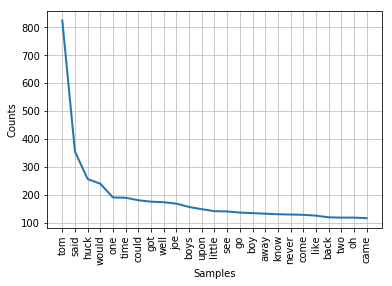

In [7]:
frequency_dist = nltk.FreqDist(no_sw)
frequency_dist.plot(25)
plt.show()

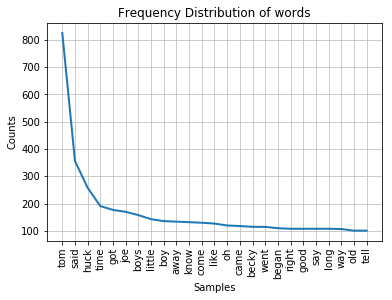

In [8]:
#Adding more stop words from sklearn.
new_stop_words = set(stop_words + list(ENGLISH_STOP_WORDS))

no_nsw = []
for word in words:
    if word not in new_stop_words:
        no_nsw.append(word)
#no_nsw[:5]

frequency_dist_2 = nltk.FreqDist(no_nsw)
frequency_dist_2.plot(25, title = 'Frequency Distribution of words')
plt.show()

In [9]:
def plot_word_freq(url) :
    '''Takes a url and plots word frequenciy distribution'''
    x1 = requests.get(url)             # Make the request.
    html = x1.text                      # Extract HTML from Request objest.      
    soup = BeautifulSoup(html, "lxml")  # Create a Beautiful Soup object from HTML.
    text = soup.get_text()              # Get the text out of the soup.
    tokenizer = RegexpTokenizer('\w+')
    tokens = tokenizer.tokenize(text)
    words = []
    for word in tokens:
        words.append(word.lower())

    stop_words = nltk.corpus.stopwords.words('english')
    new_stop_words = set(stop_words + list(ENGLISH_STOP_WORDS))
    
    no_nsw = []
    for word in words:
        if word not in new_stop_words:
            no_nsw.append(word)
            
    frequency_dist_2 = nltk.FreqDist(no_nsw)
    frequency_dist_2.plot(25, title = 'Frequency Distribution of words')
    plt.show()

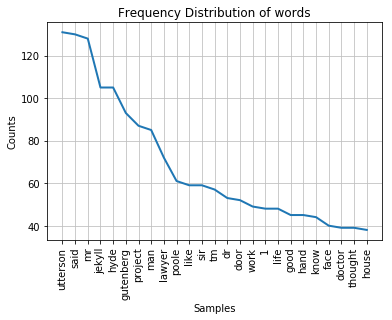

In [10]:
plot_word_freq('http://www.gutenberg.org/files/43/43-h/43-h.htm')